#**Data Importing and Data Preprocessing**

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/houseprices-apartments1.csv')

In [3]:
df.head()

,locality,title,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,"1 BHK Apartment For Sale In Sandy Villa, Btm...",565 sqft,"20,060/Month","₹6,195 per sq.ft.",North-West,1 BHK,1,Bike
1,BTM Layout,3 BHK Apartment For Sale In Sobha Magnolia I...,"1,837 sqft","97,434/Month","₹9,254 per sq.ft.",East,3 BHK,3,Bike and Car
2,BTM Layout,2 BHK Flat For Sale In Nandi Jewels In Btm 2...,"1,280 sqft","54,448/Month","₹7,422 per sq.ft.",East,2 BHK,2,Car
3,BTM Layout,3 BHK Apartment For Sale In Brigade Lakeview...,"2,220 sqft",1.17 Lacs/Month,"₹9,234 per sq.ft.",North,3 BHK,3,Bike and Car
4,BTM Layout,2 BHK Apartment For Sale In Niranjan Central...,"1,113 sqft","34,388/Month","₹5,391 per sq.ft.",East,2 BHK,2,Bike and Car


In [4]:
df.drop(['title'], axis = 1, inplace = True)
df['area'] = [ (data.split(' ')[0]).replace(',','') for data in df['area'] ]
#df['rent'].iloc[0].split('/')
df['rent'] = [ (data.split(' ')[0]) for data in df['rent'] ]
df['rent'] = [ (data.split('/')[0]).replace(',','') for data in df['rent'] ]
df['rent'] = df['rent'].astype(float)
#df['rent'] = [ (data.split('/')[0]).replace(',','') for data in df['rent'] ]

In [5]:
df.head()

,locality,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,565,20060.00,"₹6,195 per sq.ft.",North-West,1 BHK,1,Bike
1,BTM Layout,1837,97434.00,"₹9,254 per sq.ft.",East,3 BHK,3,Bike and Car
2,BTM Layout,1280,54448.00,"₹7,422 per sq.ft.",East,2 BHK,2,Car
3,BTM Layout,2220,1.17,"₹9,234 per sq.ft.",North,3 BHK,3,Bike and Car
4,BTM Layout,1113,34388.00,"₹5,391 per sq.ft.",East,2 BHK,2,Bike and Car


In [6]:
df['rent'] = df['rent'].apply(lambda x: x*100000 if x<10 else x)
df['price_per_sqft'] = [ float((data.split(' ')[0]).replace(',','').replace('₹', '')) for data in df['price_per_sqft'] ]
df['BHK'] = [ float((data.split(' ')[0]).replace('+','')) for data in df['BHK'] ]


In [7]:
df.head()

,locality,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,565,20060.0,6195.0,North-West,1.0,1,Bike
1,BTM Layout,1837,97434.0,9254.0,East,3.0,3,Bike and Car
2,BTM Layout,1280,54448.0,7422.0,East,2.0,2,Car
3,BTM Layout,2220,117000.0,9234.0,North,3.0,3,Bike and Car
4,BTM Layout,1113,34388.0,5391.0,East,2.0,2,Bike and Car


In [8]:
df.head()

,locality,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,565,20060.0,6195.0,North-West,1.0,1,Bike
1,BTM Layout,1837,97434.0,9254.0,East,3.0,3,Bike and Car
2,BTM Layout,1280,54448.0,7422.0,East,2.0,2,Car
3,BTM Layout,2220,117000.0,9234.0,North,3.0,3,Bike and Car
4,BTM Layout,1113,34388.0,5391.0,East,2.0,2,Bike and Car


In [9]:
(df['facing'] == "Don't Know").sum()

19

In [10]:
df.bathrooms.unique()

array([ 1,  3,  2,  5, 13,  4, 26, 16,  6, 14])

In [11]:
sum(df['bathrooms']>10)

4

In [12]:
df = df[df['bathrooms']<10]

In [13]:
sum(df['bathrooms']>10)


0

In [14]:
df.parking.unique()

array(['Bike', 'Bike and Car', 'Car', 'None'], dtype=object)

In [15]:
(df['parking'] == 'None').sum()

6

In [16]:
df = df[df['parking']!='None']

In [17]:
df.head()

,locality,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,565,20060.0,6195.0,North-West,1.0,1,Bike
1,BTM Layout,1837,97434.0,9254.0,East,3.0,3,Bike and Car
2,BTM Layout,1280,54448.0,7422.0,East,2.0,2,Car
3,BTM Layout,2220,117000.0,9234.0,North,3.0,3,Bike and Car
4,BTM Layout,1113,34388.0,5391.0,East,2.0,2,Bike and Car


In [18]:
df.facing.unique()

array(['North-West', 'East', 'North', 'West', 'North-East', 'South-East',
       'South', "Don't Know"], dtype=object)

In [19]:
df['area'].astype(float)
df['rent'].astype(float)
df['price_per_sqft'].astype(float)
df['BHK'].astype(float)
df['bathrooms'].astype(float)

0      1.0
1      3.0
2      2.0
3      3.0
4      2.0
      ... 
220    2.0
221    3.0
222    2.0
223    5.0
224    2.0
Name: bathrooms, Length: 215, dtype: float64

In [20]:
df = df[df["BHK"]!=4]

In [21]:
df

,locality,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,565,20060.0,6195.0,North-West,1.0,1,Bike
1,BTM Layout,1837,97434.0,9254.0,East,3.0,3,Bike and Car
2,BTM Layout,1280,54448.0,7422.0,East,2.0,2,Car
3,BTM Layout,2220,117000.0,9234.0,North,3.0,3,Bike and Car
4,BTM Layout,1113,34388.0,5391.0,East,2.0,2,Bike and Car
...,...,...,...,...,...,...,...,...
219,Jayanagar,1200,42985.0,6250.0,East,3.0,2,Bike and Car
220,Jayanagar,1060,45851.0,7547.0,Don't Know,2.0,2,Bike and Car
221,Jayanagar,2000,85971.0,7500.0,East,3.0,3,Bike and Car
222,Jayanagar,1340,77947.0,10149.0,East,3.0,2,Bike and Car


In [22]:
df['facing'] = df['facing'].apply(lambda x: x if x!="Don't Know" else np.nan)

In [23]:
df = df.reset_index()


In [24]:
df = df.drop(['index'], axis = 1)

In [25]:
df.groupby('facing').count()

,locality,area,rent,price_per_sqft,BHK,bathrooms,parking
facing,,,,,,,
East,69,69,69,69,69,69,69
North,40,40,40,40,40,40,40
North-East,12,12,12,12,12,12,12
North-West,5,5,5,5,5,5,5
South,15,15,15,15,15,15,15
South-East,4,4,4,4,4,4,4
West,42,42,42,42,42,42,42


#**Visualization**

In [26]:
data = df

In [27]:
data = data[data['rent']<200000]

In [28]:
data.area.describe()

count      198
unique     131
top       1200
freq         8
Name: area, dtype: object

In [29]:
data['area'] = data['area'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
np.arange(0, 1500, 100)

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400])

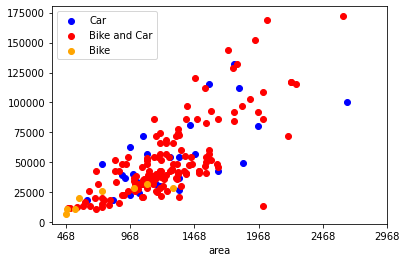

In [31]:
import matplotlib.pyplot as plt
plt.scatter(data[data['parking']=='Car'].area,data[data['parking']=='Car'].rent, color ="blue", label = 'Car')
plt.scatter(data[data['parking']=='Bike and Car'].area,data[data['parking']=='Bike and Car'].rent,color ="red", label = 'Bike and Car')
plt.scatter(data[data['parking']=='Bike'].area,data[data['parking']=='Bike'].rent,color ="orange", label = 'Bike')
plt.xticks(np.arange(data.area.min(), 3000, 500))
#plt.yticks(np.arange(0, 150, 100))

plt.xlabel('area')
plt.xticks(rotation=0)
plt.legend()
#plt.show()

<BarContainer object of 9 artists>

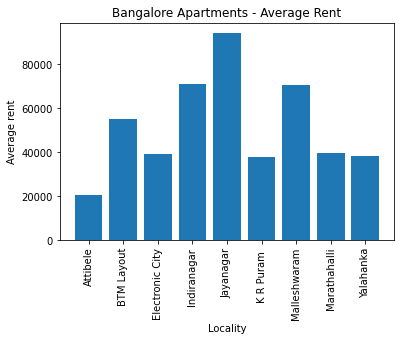

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
x = data.groupby('locality')['rent'].mean().index
y = data.groupby('locality')['rent'].mean()
plt.xlabel('Locality')
plt.ylabel('Average rent')
plt.xticks(rotation=90)
plt.title('Bangalore Apartments - Average Rent')
plt.bar(x,y)

<BarContainer object of 9 artists>

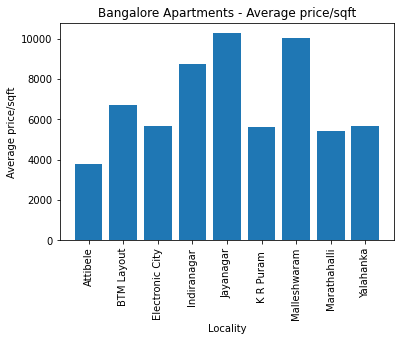

In [33]:
x = data.groupby('locality')['price_per_sqft'].mean().index
y = data.groupby('locality')['price_per_sqft'].mean()
plt.xlabel('Locality')
plt.ylabel('Average price/sqft')
plt.xticks(rotation=90)
plt.title('Bangalore Apartments - Average price/sqft')
plt.bar(x,y)

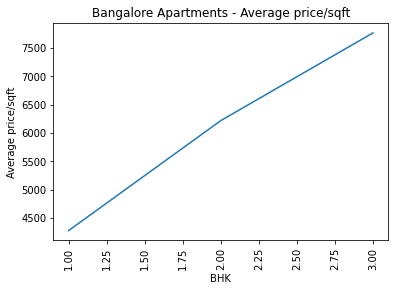

In [34]:
x = data.groupby('BHK')['price_per_sqft'].mean().index
y = data.groupby('BHK')['price_per_sqft'].mean()
plt.xlabel('BHK')
plt.ylabel('Average price/sqft')
plt.xticks(rotation=90)
plt.title('Bangalore Apartments - Average price/sqft')
plt.plot(x,y)


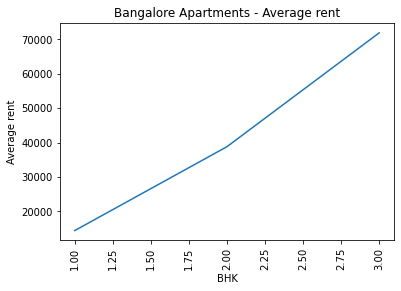

In [35]:
x = data.groupby('BHK')['rent'].mean().index
y = data.groupby('BHK')['rent'].mean()
plt.xlabel('BHK')
plt.ylabel('Average rent')
plt.xticks(rotation=90)
plt.title('Bangalore Apartments - Average rent')
plt.plot(x,y)

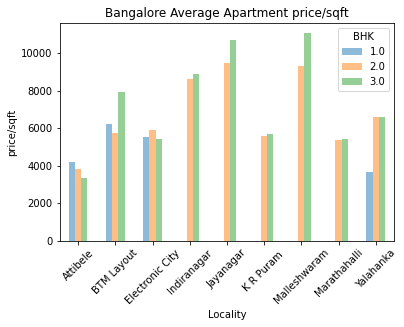

In [36]:
df_pivot = pd.pivot_table(data, values="price_per_sqft",index="locality",columns="BHK", aggfunc=np.mean)
#Creating a grouped bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5)
#Adding the aesthetics
plt.title('Bangalore Average Apartment price/sqft')
plt.xlabel('Locality')
plt.ylabel('price/sqft') 
plt.xticks(rotation=45)
# Show the plot
plt.show()

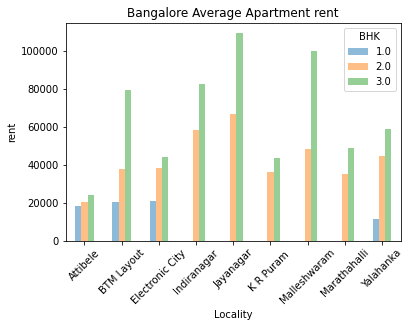

In [37]:
df_pivot = pd.pivot_table(data, values="rent",index="locality",columns="BHK", aggfunc=np.mean)
#Creating a grouped bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5)
#Adding the aesthetics
plt.title('Bangalore Average Apartment rent')
plt.xlabel('Locality')
plt.ylabel('rent') 
plt.xticks(rotation=45)
# Show the plot
plt.show()

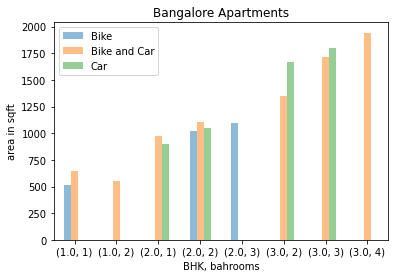

In [83]:
df_pivot = pd.pivot_table(data, values="area",index=["BHK",'bathrooms'],columns="parking", aggfunc=np.mean)
#Creating a grouped bar chart


ax = df_pivot.plot(kind="bar",alpha=0.5)
#Adding the aesthetics
#plt.figure(figsize=(10,10))
plt.title('Bangalore Apartments')
plt.xlabel('BHK, bahrooms')
plt.ylabel('area in sqft') 
plt.xticks(rotation=0)
#plt.plot(data.BHK, data.price_per_sqft)
# Show the plot
plt.legend()

No handles with labels found to put in legend.


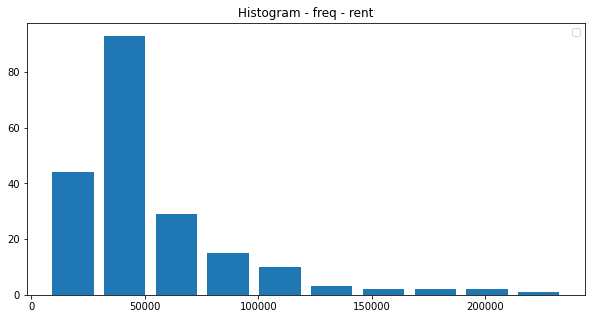

In [39]:
plt.figure(figsize=(10,5))
plt.hist(df.rent, rwidth = 0.8)
plt.title('Histogram - freq - rent')
plt.legend()

In [40]:
df.rent.describe()

count       201.000000
mean      52086.318408
std       36513.785688
min        6877.000000
25%       31522.000000
50%       41266.000000
75%       57314.000000
max      235000.000000
Name: rent, dtype: float64

In [41]:
data

,locality,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,565.0,20060.0,6195.0,North-West,1.0,1,Bike
1,BTM Layout,1837.0,97434.0,9254.0,East,3.0,3,Bike and Car
2,BTM Layout,1280.0,54448.0,7422.0,East,2.0,2,Car
3,BTM Layout,2220.0,117000.0,9234.0,North,3.0,3,Bike and Car
4,BTM Layout,1113.0,34388.0,5391.0,East,2.0,2,Bike and Car
...,...,...,...,...,...,...,...,...
196,Jayanagar,1200.0,42985.0,6250.0,East,3.0,2,Bike and Car
197,Jayanagar,1060.0,45851.0,7547.0,NaN,2.0,2,Bike and Car
198,Jayanagar,2000.0,85971.0,7500.0,East,3.0,3,Bike and Car
199,Jayanagar,1340.0,77947.0,10149.0,East,3.0,2,Bike and Car


#**Imputation**
There are a few missing values in "facing" column represented by NaN, the missing values in "parking" column are dropped.

We try to impute the values using rent, price per square foot, area and number of bed rooms.

In [42]:
df1 = pd.DataFrame(df, columns = ['rent','area','price_per_sqft','BHK','bathrooms','facing'])

In [43]:
train_df = df1
train_df = train_df.dropna()

In [44]:
test_df = df1[df1['facing'].isna()]
test_df

,rent,area,price_per_sqft,BHK,bathrooms,facing
96,201000.0,2450,14286.0,3.0,3,NaN
104,85971.0,1650,9091.0,3.0,3,NaN
107,71643.0,1165,10730.0,2.0,2,NaN
117,31522.0,720,7639.0,1.0,1,NaN
127,49290.0,1850,4649.0,3.0,2,NaN
135,33242.0,860,6744.0,2.0,1,NaN
136,38572.0,1010,6663.0,3.0,2,NaN
140,34388.0,1100,5455.0,3.0,3,NaN
153,82864.0,1556,9292.0,3.0,3,NaN
154,72658.0,1349,9398.0,2.0,2,NaN


In [45]:
train_df.isna().sum()

rent              0
area              0
price_per_sqft    0
BHK               0
bathrooms         0
facing            0
dtype: int64

In [46]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
y_train

67           West
65           West
118          West
106          East
124         South
          ...    
109         North
14          North
92          North
191          East
103    North-West
Name: facing, Length: 125, dtype: object

In [49]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[16,  1,  0,  0,  1,  0,  1],
       [13,  1,  1,  0,  0,  0,  2],
       [ 4,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0],
       [ 6,  1,  0,  0,  0,  0,  6]])

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.3709677419354839

In [52]:
pred

array(['East', 'East', 'West', 'East', 'East', 'East', 'East', 'East',
       'East', 'East', 'North', 'East', 'East', 'East', 'West', 'West',
       'East', 'East', 'West', 'East', 'East', 'North', 'West', 'East',
       'East', 'East', 'East', 'East', 'East', 'East', 'West', 'North',
       'East', 'West', 'West', 'East', 'East', 'East', 'North-East',
       'East', 'East', 'East', 'East', 'East', 'South', 'East', 'East',
       'East', 'East', 'East', 'East', 'East', 'East', 'East', 'North',
       'East', 'East', 'East', 'East', 'East', 'West', 'East'],
      dtype=object)

In [53]:
test_df['facing'].head()

96     NaN
104    NaN
107    NaN
117    NaN
127    NaN
Name: facing, dtype: object

In [54]:
test_df.iloc[:,-1] = neigh.predict(test_df.iloc[:,:-1])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [55]:
df2 = (pd.concat([train_df,test_df], axis = 'rows'))

In [56]:
df2.isna().sum()

rent              0
area              0
price_per_sqft    0
BHK               0
bathrooms         0
facing            0
dtype: int64

In [57]:
df['facing'] = df2['facing']

In [58]:
df.reset_index()

,index,locality,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,0,BTM Layout,565,20060.0,6195.0,North-West,1.0,1,Bike
1,1,BTM Layout,1837,97434.0,9254.0,East,3.0,3,Bike and Car
2,2,BTM Layout,1280,54448.0,7422.0,East,2.0,2,Car
3,3,BTM Layout,2220,117000.0,9234.0,North,3.0,3,Bike and Car
4,4,BTM Layout,1113,34388.0,5391.0,East,2.0,2,Bike and Car
...,...,...,...,...,...,...,...,...,...
196,196,Jayanagar,1200,42985.0,6250.0,East,3.0,2,Bike and Car
197,197,Jayanagar,1060,45851.0,7547.0,East,2.0,2,Bike and Car
198,198,Jayanagar,2000,85971.0,7500.0,East,3.0,3,Bike and Car
199,199,Jayanagar,1340,77947.0,10149.0,East,3.0,2,Bike and Car


In [59]:
df.isna().sum()

locality          0
area              0
rent              0
price_per_sqft    0
facing            0
BHK               0
bathrooms         0
parking           0
dtype: int64

#**Prediction**

In [60]:
df.head()

,locality,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,565,20060.0,6195.0,North-West,1.0,1,Bike
1,BTM Layout,1837,97434.0,9254.0,East,3.0,3,Bike and Car
2,BTM Layout,1280,54448.0,7422.0,East,2.0,2,Car
3,BTM Layout,2220,117000.0,9234.0,North,3.0,3,Bike and Car
4,BTM Layout,1113,34388.0,5391.0,East,2.0,2,Bike and Car


In [61]:
df['area'] = df['area'].astype(float)

**One-Hot Encoding for Locality, facing and parking**

In [62]:
categ_coloumn = [column for column in df.columns if (df[column].dtype == "object")]
categ_coloumn

['locality', 'facing', 'parking']

In [63]:
numeric_column = df.drop(categ_coloumn, axis = 1).columns
numeric_column

Index(['area', 'rent', 'price_per_sqft', 'BHK', 'bathrooms'], dtype='object')

In [64]:
df = pd.DataFrame(df, columns = ['locality', 'facing', 'parking','area', 'rent', 'BHK', 'bathrooms', 'price_per_sqft'])

In [65]:
df.head()

,locality,facing,parking,area,rent,BHK,bathrooms,price_per_sqft
0,BTM Layout,North-West,Bike,565.0,20060.0,1.0,1,6195.0
1,BTM Layout,East,Bike and Car,1837.0,97434.0,3.0,3,9254.0
2,BTM Layout,East,Car,1280.0,54448.0,2.0,2,7422.0
3,BTM Layout,North,Bike and Car,2220.0,117000.0,3.0,3,9234.0
4,BTM Layout,East,Bike and Car,1113.0,34388.0,2.0,2,5391.0


In [66]:
df = pd.get_dummies(df, columns = ['locality','facing'])
df

,parking,area,rent,BHK,bathrooms,price_per_sqft,locality_Attibele,locality_BTM Layout,locality_Electronic City,locality_Indiranagar,locality_Jayanagar,locality_K R Puram,locality_Malleshwaram,locality_Marathahalli,locality_Yalahanka,facing_East,facing_North,facing_North-East,facing_North-West,facing_South,facing_South-East,facing_West
0,Bike,565.0,20060.0,1.0,1,6195.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Bike and Car,1837.0,97434.0,3.0,3,9254.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Car,1280.0,54448.0,2.0,2,7422.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Bike and Car,2220.0,117000.0,3.0,3,9234.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Bike and Car,1113.0,34388.0,2.0,2,5391.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Bike and Car,1200.0,42985.0,3.0,2,6250.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
197,Bike and Car,1060.0,45851.0,2.0,2,7547.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
198,Bike and Car,2000.0,85971.0,3.0,3,7500.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
199,Bike and Car,1340.0,77947.0,3.0,2,10149.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [67]:
df.parking.unique()

array(['Bike', 'Bike and Car', 'Car'], dtype=object)

**Encoding data using np.select function**

In [68]:
conditions = [
    (df['parking'] == 'Bike and Car'),
    (df['parking'] == 'Car'),
    (df['parking'] == 'Bike')
    ]

# create a list of the values we want to assign for each condition
values = [3,2,1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,parking,area,rent,BHK,bathrooms,price_per_sqft,locality_Attibele,locality_BTM Layout,locality_Electronic City,locality_Indiranagar,locality_Jayanagar,locality_K R Puram,locality_Malleshwaram,locality_Marathahalli,locality_Yalahanka,facing_East,facing_North,facing_North-East,facing_North-West,facing_South,facing_South-East,facing_West,tier
0,Bike,565.0,20060.0,1.0,1,6195.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,Bike and Car,1837.0,97434.0,3.0,3,9254.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
2,Car,1280.0,54448.0,2.0,2,7422.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
3,Bike and Car,2220.0,117000.0,3.0,3,9234.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
4,Bike and Car,1113.0,34388.0,2.0,2,5391.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3


In [69]:
df.drop(['parking'], axis = 1, inplace = True)


In [70]:
df.rename(columns = {'tier':'parking'})

,area,rent,BHK,bathrooms,price_per_sqft,locality_Attibele,locality_BTM Layout,locality_Electronic City,locality_Indiranagar,locality_Jayanagar,locality_K R Puram,locality_Malleshwaram,locality_Marathahalli,locality_Yalahanka,facing_East,facing_North,facing_North-East,facing_North-West,facing_South,facing_South-East,facing_West,parking
0,565.0,20060.0,1.0,1,6195.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1837.0,97434.0,3.0,3,9254.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
2,1280.0,54448.0,2.0,2,7422.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
3,2220.0,117000.0,3.0,3,9234.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
4,1113.0,34388.0,2.0,2,5391.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1200.0,42985.0,3.0,2,6250.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3
197,1060.0,45851.0,2.0,2,7547.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3
198,2000.0,85971.0,3.0,3,7500.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3
199,1340.0,77947.0,3.0,2,10149.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3


In [89]:
y = df['price_per_sqft']
X = df.drop(['price_per_sqft'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

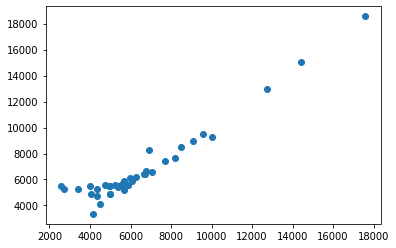

In [91]:
import matplotlib.pyplot as plt
plt.scatter(y_test, pred)

In [92]:
np.corrcoef(y_test, pred)

array([[1.        , 0.96203884],
       [0.96203884, 1.        ]])

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))


Coefficients: 
 [-3.76499359e+00  9.11684608e-02  2.94122554e+02 -2.98560136e+02
 -1.39188940e+03 -1.18145149e+01 -2.03656506e+02  4.33793962e+02
  6.54522516e+02 -2.61607577e+02  1.26395321e+03 -1.54377618e+02
 -3.28924065e+02  1.60446566e+01 -2.57230858e+02  3.63222149e+02
  4.04665334e+01  1.81878794e+02 -2.17276874e+02 -1.27104401e+02
  7.57815895e+01]
Mean squared error: 716491.20
Coefficient of determination: 0.92


In [97]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X_train, y_train, cv=5)
scores

array([0.89385964, 0.93201853, 0.91780972, 0.92935026, 0.95404388])

In [95]:
reg.score(X_test,y_test)

0.9169714242524969

In [123]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state = 0)
scores = cross_val_score(LinearRegression(), X, y, cv=cv)
scores


array([0.92618198, 0.94732724, 0.95078886, 0.91264309, 0.884632  ])

In [124]:
cv

ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None)

In [125]:
X_test.head()

,area,rent,BHK,bathrooms,locality_Attibele,locality_BTM Layout,locality_Electronic City,locality_Indiranagar,locality_Jayanagar,locality_K R Puram,locality_Malleshwaram,locality_Marathahalli,locality_Yalahanka,facing_East,facing_North,facing_North-East,facing_North-West,facing_South,facing_South-East,facing_West,tier
95,1100.0,51583.0,2.0,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,3
15,2200.0,71643.0,3.0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
30,1007.0,25791.0,2.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
158,468.0,6877.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
128,990.0,40120.0,2.0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2


In [184]:
def predict_price(area,rent,BHK,bathrooms,locality,facing,parking):
  x1 = np.zeros(len(X.columns))
  x1[:4] = [area,rent,BHK,bathrooms]
  x1[-1] = parking
  loc_index = np.where(X.columns == locality)[0][0]
  facing_index = np.where(X.columns == facing)[0][0]

  if loc_index>0:
    x1[loc_index] = 1
  if facing_index>0:
    x1[facing_index] = 1  
  return reg.predict([x1])[0]


In [202]:
try:
  x = predict_price(1200,30000,2,2,'locality_Indiranagar','facing_North',1)

except: 
  x ='Not Found'

print(x)

5148.329843010703


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
